In [63]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [62]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [6]:
#Read in the csv file and convert to a Pandas dataframe
player = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:
dtale.show(player)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [35]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [36]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [38]:
player.describe(include="object")

,player,team,name,position
count,10754,10754,10754,10754
unique,10754,374,10584,16
top,/alexander-badolato/profil/spieler/957230,Daejeon Hana Citizen,Paulinho,Defender Centre-Back
freq,1,46,6,1821


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [11]:
# from https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [12]:
# This dataset was generated by scraping data from Transfermarkt using Selenium and BeautifulSoup on June 10, 2023.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [13]:
# بعد مراجعة شاملة لجميع الأعمدة في كافة البيانات المتاحة، يمكننا التأكيد بثقة على أنها متوافقة ومتناغمة عبر جميع المصادر دون أي تباينات أو اختلافات.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [14]:
# The dataset contains detailed and relevant information about football players,
#  including names, teams, positions, statistics, and achievements, providing a comprehensive view of player performance.
#  These attributes are directly linked to football analysis and are essential for deriving valuable insights into player evaluation and performance.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [15]:
player.duplicated().sum()

np.int64(0)

In [16]:
player['player'].duplicated().sum()

np.int64(0)

In [17]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [18]:
# Display number missing values per column
player.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [19]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [20]:
# check columns types 
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [21]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               10754 non-null  object  
 1   team                 10754 non-null  object  
 2   name                 10754 non-null  object  
 3   position             10754 non-null  category
 4   height               10754 non-null  float64 
 5   age                  10754 non-null  float64 
 6   appearance           10754 non-null  int64   
 7   goals                10754 non-null  float64 
 8   assists              10754 non-null  float64 
 9   yellow cards         10754 non-null  float64 
 10  second yellow cards  10754 non-null  float64 
 11  red cards            10754 non-null  float64 
 12  goals conceded       10754 non-null  float64 
 13  clean sheets         10754 non-null  float64 
 14  minutes played       10754 non-null  int64   
 15  days_injured       

In [22]:
player['position'].unique()

['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back', 'Defender Right-Back', 'midfield-DefensiveMidfield', ..., 'midfield-LeftMidfield', 'Attack-SecondStriker', 'midfield', 'Attack', 'Defender']
Length: 16
Categories (16, object): ['Attack', 'Attack Centre-Forward', 'Attack-LeftWinger', 'Attack-RightWinger', ..., 'midfield-CentralMidfield', 'midfield-DefensiveMidfield', 'midfield-LeftMidfield', 'midfield-RightMidfield']

In [23]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [24]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [25]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [26]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [8]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [9]:
# Change player type column position to category
player['position'] = player['position'].astype('category')

In [10]:
# go back to 7th dimension Accuracy 

# ML

In [50]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               10754 non-null  object  
 1   team                 10754 non-null  object  
 2   name                 10754 non-null  object  
 3   position             10754 non-null  category
 4   height               10754 non-null  float64 
 5   age                  10754 non-null  float64 
 6   appearance           10754 non-null  int64   
 7   goals                10754 non-null  float64 
 8   assists              10754 non-null  float64 
 9   yellow cards         10754 non-null  float64 
 10  second yellow cards  10754 non-null  float64 
 11  red cards            10754 non-null  float64 
 12  goals conceded       10754 non-null  float64 
 13  clean sheets         10754 non-null  float64 
 14  minutes played       10754 non-null  int64   
 15  days_injured       

In [27]:
player.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [28]:
categorical_features = ['team','position']
numeric_features = ['height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']

In [29]:
for i in categorical_features:
   print (player[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
Olympique Marseille       22
CA Osasuna                22
West Ham United           22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64


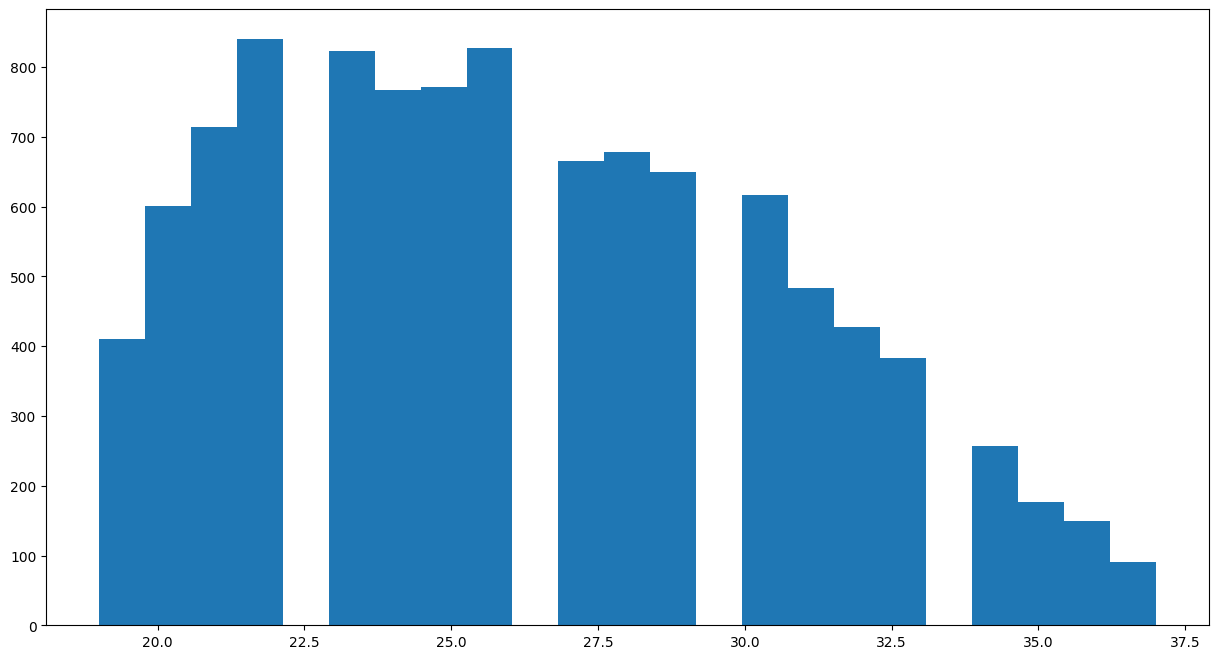

In [30]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['age']);
#plt.hist(player['age'], bins=50);
plt.hist(player[(player['age']>=19) & (player['age'] < 38)]['age'], bins=23);

In [31]:
player = player[(player['age']>=19) & (player['age'] < 38)]

In [32]:
player.shape

(10336, 22)

In [33]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10336 entries, 0 to 10752
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               10336 non-null  object  
 1   team                 10336 non-null  object  
 2   name                 10336 non-null  object  
 3   position             10336 non-null  category
 4   height               10336 non-null  float64 
 5   age                  10336 non-null  float64 
 6   appearance           10336 non-null  int64   
 7   goals                10336 non-null  float64 
 8   assists              10336 non-null  float64 
 9   yellow cards         10336 non-null  float64 
 10  second yellow cards  10336 non-null  float64 
 11  red cards            10336 non-null  float64 
 12  goals conceded       10336 non-null  float64 
 13  clean sheets         10336 non-null  float64 
 14  minutes played       10336 non-null  int64   
 15  days_injured         103

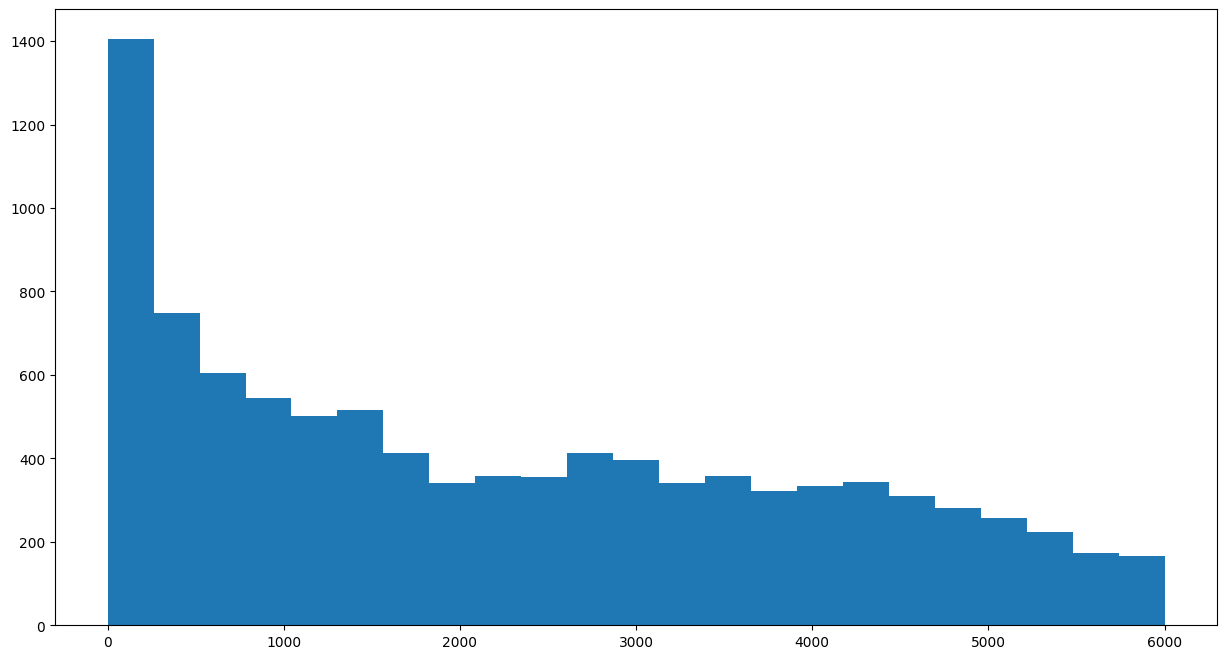

In [34]:
plt.figure(figsize=(15,8))
#plt.hist(player['minutes played'], bins=50);
plt.hist(player[(player['minutes played']<=6000)]['minutes played'], bins=23);

In [35]:
player = player[(player['minutes played']<=6000)]

In [36]:
player.shape

(9703, 22)

In [37]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9703 entries, 1 to 10752
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   player               9703 non-null   object  
 1   team                 9703 non-null   object  
 2   name                 9703 non-null   object  
 3   position             9703 non-null   category
 4   height               9703 non-null   float64 
 5   age                  9703 non-null   float64 
 6   appearance           9703 non-null   int64   
 7   goals                9703 non-null   float64 
 8   assists              9703 non-null   float64 
 9   yellow cards         9703 non-null   float64 
 10  second yellow cards  9703 non-null   float64 
 11  red cards            9703 non-null   float64 
 12  goals conceded       9703 non-null   float64 
 13  clean sheets         9703 non-null   float64 
 14  minutes played       9703 non-null   int64   
 15  days_injured         9703

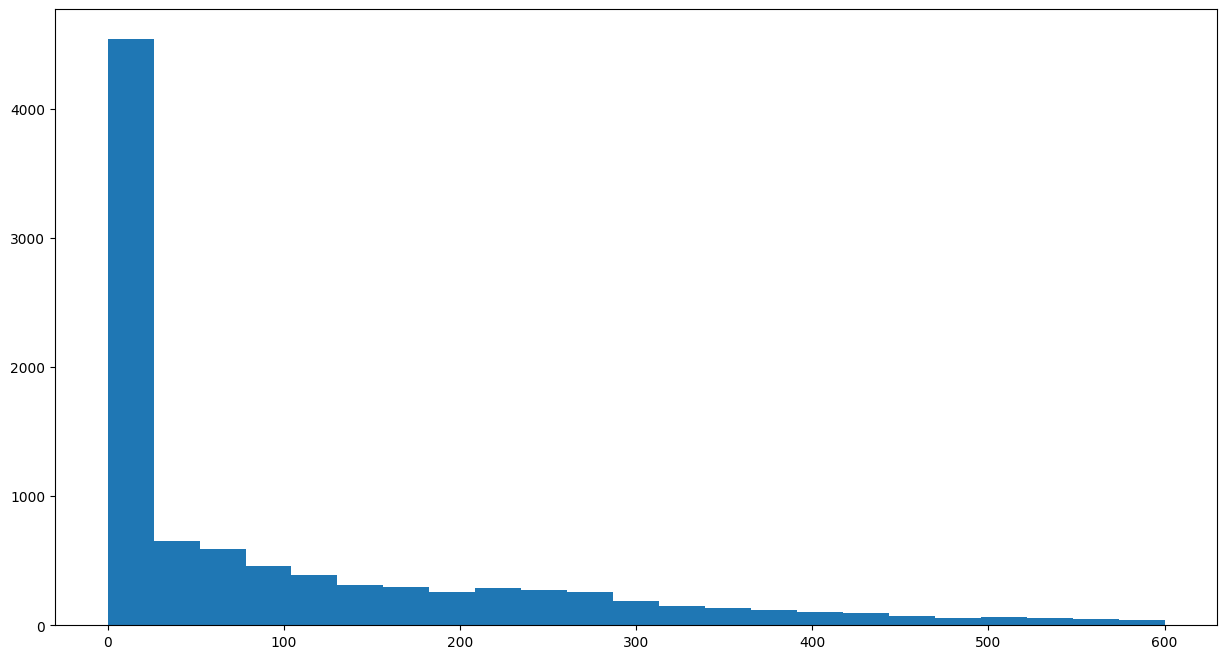

In [38]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['age']);
#plt.hist(player['days_injured'], bins=50);
plt.hist(player[(player['days_injured'] <= 600)]['days_injured'], bins=23);

In [39]:
player = player[(player['days_injured'] <= 600)]
player.shape

(9446, 22)

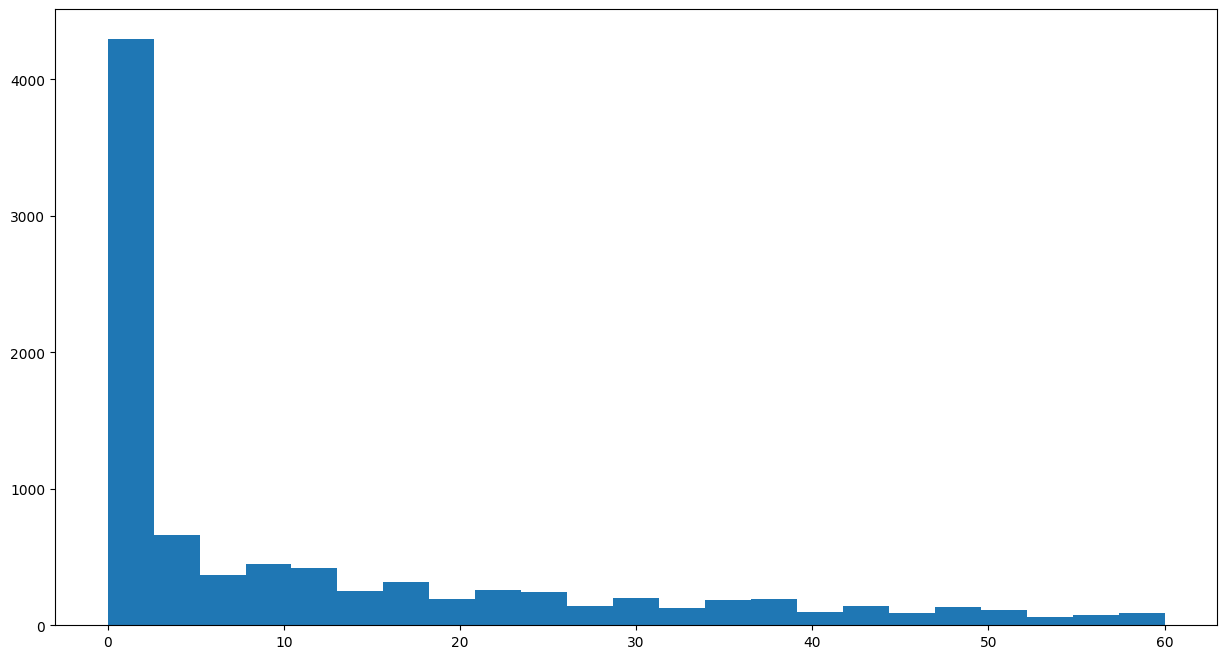

In [40]:
plt.figure(figsize=(15,8))
#plt.boxplot(player['age']);
#plt.hist(player['games_injured'], bins=50);
plt.hist(player[(player['games_injured'] <= 60)]['games_injured'], bins=23);

In [41]:
player=player[(player['games_injured'] <= 60)]
player.shape

(9117, 22)

In [42]:
player = pd.get_dummies(player, columns=categorical_features)

In [45]:
player.head(2)

,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,Jack Butland,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,...,False,False,False,True,False,False,False,False,False,False
4,Raphaël Varane,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,...,True,False,False,False,False,False,False,False,False,False


#### Feature selection

In [52]:
player.drop(columns=['name'], inplace=True)

In [51]:
player.drop(columns=['player'], inplace=True)

KeyError: "['player'] not found in axis"

In [53]:
correlation = player.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.811571
appearance             0.376312
minutes played         0.354127
award                  0.257663
                         ...   
clean sheets          -0.028895
position_midfield     -0.032417
goals conceded        -0.075366
age                   -0.076302
position_Goalkeeper   -0.095894
Name: current_value, Length: 408, dtype: float64


In [56]:
# Set the correlation threshold
threshold = 0.1 

selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'team_Arsenal FC', 'team_Bayern Munich',
       'team_Chelsea FC', 'team_FC Barcelona', 'team_Liverpool FC',
       'team_Manchester City', 'team_Manchester United',
       'team_Paris Saint-Germain', 'team_SSC Napoli',
       'team_Tottenham Hotspur'],
      dtype='object')

In [59]:
selected_features = ['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'team_Arsenal FC', 'team_Bayern Munich',
       'team_Chelsea FC', 'team_FC Barcelona', 'team_Liverpool FC',
       'team_Manchester City', 'team_Manchester United',
       'team_Paris Saint-Germain', 'team_SSC Napoli',
       'team_Tottenham Hotspur','team_Real Madrid']

In [ ]:
player[player['team_Real Madrid']]

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1505,191.0,24.0,16,0.000000,0.000000,0.000000,0.0,0.000000,1.040816,0.244898,...,False,False,False,True,False,False,False,False,False,False
1509,180.0,33.0,86,0.069005,0.017251,0.310523,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,False
1511,180.0,27.0,63,0.036885,0.110656,0.202869,0.0,0.000000,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False
1513,173.0,31.0,71,0.157068,0.067315,0.157068,0.0,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,False
1514,176.0,27.0,33,0.045965,0.045965,0.183861,0.0,0.045965,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,False
1517,182.0,20.0,105,0.033070,0.066140,0.396840,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,True,False,False,False
1519,179.0,26.0,64,0.039526,0.395257,0.395257,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,True,False,False,False
1522,175.0,32.0,33,0.138996,0.277992,0.138996,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
1527,180.0,29.0,22,0.163043,0.163043,0.652174,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [60]:
player = player[selected_features]
player.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,...,team_Bayern Munich,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_SSC Napoli,team_Tottenham Hotspur,team_Real Madrid
1,15,0.000000,0.000000,1304,510,58,1,1500000,22000000,1,...,False,False,False,False,False,True,False,False,False,False
4,63,0.017889,0.017889,5031,238,51,21,40000000,80000000,2,...,False,False,False,False,False,True,False,False,False,False
5,68,0.037799,0.000000,4762,148,27,1,25000000,70000000,2,...,False,False,False,False,False,True,False,False,False,False
6,70,0.000000,0.032901,5471,95,19,10,15000000,35000000,2,...,False,False,False,False,False,True,False,False,False,False
8,34,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,...,False,False,False,False,False,True,False,False,False,False


In [61]:
player.shape

(9117, 21)

####  train and test data

In [64]:
# Prepare data
X = player.drop(['current_value'], axis=1)
y = player['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X.shape

(9117, 20)

## Buliding the Model

In [68]:
model = LinearRegression()

## Train the Model

In [69]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [70]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)      

## Interpretation of the Model

In [71]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])   # Linear model cofficients

In [72]:
coeff_df

,Coefficient
appearance,-3.685698e+05
goals,1.130878e+05
assists,1.199226e+05
minutes played,1.017875e+06
days_injured,1.073206e+05
games_injured,-3.704537e+05
award,-9.147745e+05
highest_value,4.814616e+06
position_encoded,1.423244e+05
team_Arsenal FC,5.391032e+05


In [73]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: 2672608.66584396


## Evaluating the Model 

In [74]:
y_base = [y_train.mean()] * len(y_test)

In [75]:
y_base

[np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.float64(2672608.66584396),
 np.floa

In [76]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 5.313121e+13


In [77]:
# MSE for Linear model
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train:2e}')
print(f'Mean Squared Error for testing: {mse_test:2e}')


Mean Squared Error for training: 1.166013e+13
Mean Squared Error for testing: 1.403618e+13


In [78]:
# our benchmark model
mae_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mae_base:2e}')

Mean Absolute  Error of base model: 3.297816e+06


In [79]:
# Linear model
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train:2e}')
print(f'Mean Absolute Error for testing: {mae_test:2e}')

Mean Absolute Error for training: 1.579882e+06
Mean Absolute Error for testing: 1.639545e+06


In [80]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base):2e}')

Root Mean Squared  Error of base model: 7.289116e+06


In [81]:
# RMSE for Linear model

print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):2e}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):2e}')


Root Mean Squared Error for training: 3.414694e+06
Root Mean Squared Error for testing: 3.746490e+06


In [82]:
# Linear model r2 score
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6998728947236594
R Square for testing: 0.735595162574376


#### Predictions vs. Real Values

In [83]:
predictions = model.predict(X_test_scaled)
#predictions

In [84]:
predictions

array([4288748.38973148, 1267705.99519651,  723982.53831304, ...,
        638202.16208883,  822411.42446339, 2466391.48319664],
      shape=(1824,))

In [85]:
Real_Values = np.array(y_test)
# Real_Values

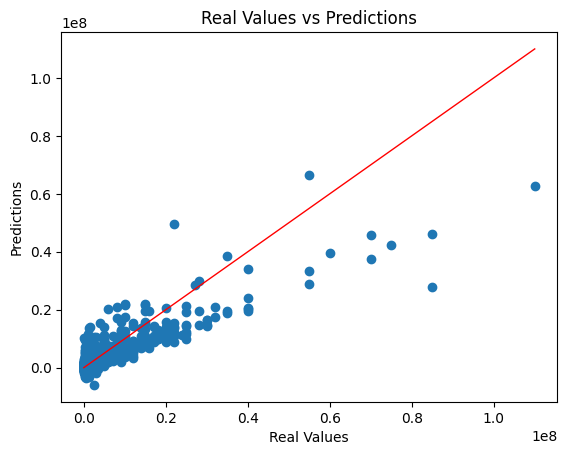

In [86]:
plt.scatter(Real_Values, predictions)
plt.plot([Real_Values.min(), Real_Values.max()], [Real_Values.min(), Real_Values.max()], color='red', lw=1)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Real Values vs Predictions')
plt.show()

#### Residual Histogram

C:\Users\ryan5\AppData\Local\Temp\ipykernel_19532\3949530067.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




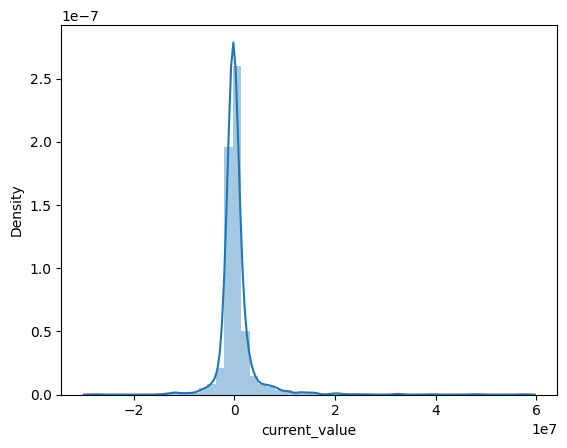

In [87]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution